In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
from platform import python_version
print(python_version())

3.6.10


In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid lightgray;
}

## Data Processing

In [5]:
test=pd.read_csv("E:/Collection_DS_takehome_challenges/Data/Pricing_Test/test_results.csv")
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 
 6   price             316800 non-null  int64 
 7   converted         316800 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [7]:
user=pd.read_csv("E:/Collection_DS_takehome_challenges/Data/Pricing_Test/user_table.csv")
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [60]:
# check uniquess
print('user_table:\t', len(user['user_id'].unique()))
print('test_results:\t', len(test['user_id'].unique()))

user_table:	 275616
test_results:	 316800


In [10]:
data=pd.merge(left=test,right=user,how='left',on='user_id')

In [11]:
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           316800 non-null  int64  
 1   timestamp         316800 non-null  object 
 2   source            316800 non-null  object 
 3   device            316800 non-null  object 
 4   operative_system  316800 non-null  object 
 5   test              316800 non-null  int64  
 6   price             316800 non-null  int64  
 7   converted         316800 non-null  int64  
 8   city              275616 non-null  object 
 9   country           275616 non-null  object 
 10  lat               275616 non-null  float64
 11  long              275616 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 31.4+ MB


In [13]:
data.describe().round(2)

,user_id,test,price,converted,lat,long
count,316800.00,316800.00,316800.00,316800.00,275616.00,275616.00
mean,499281.34,0.36,46.21,0.02,37.11,-93.98
std,288591.15,0.48,9.60,0.13,5.21,18.09
min,3.00,0.00,39.00,0.00,19.70,-157.80
25%,249525.75,0.00,39.00,0.00,33.66,-112.20
50%,499021.50,0.00,39.00,0.00,37.74,-88.93
75%,749025.50,1.00,59.00,0.00,40.70,-78.91
max,1000000.00,1.00,59.00,1.00,61.18,30.31


In [14]:
data.isnull().sum()

user_id                 0
timestamp               0
source                  0
device                  0
operative_system        0
test                    0
price                   0
converted               0
city                41184
country             41184
lat                 41184
long                41184
dtype: int64

In [15]:
data[['city','country']] = data[['city','country']].fillna('')
data[['lat','long']] = data[['lat','long']].fillna(0)

for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

user_id              316800	 [3, 9, 14, 16, 19]
timestamp            140931	 ['2015-03-02 00:04:12', '2015-03-02 00:12:40', '2015-03-02 00:16:25', '2015-03-02 00:18:46', '2015-03-02 00:22:21']
source                  12	 ['ads-bing', 'ads-google', 'ads-yahoo', 'ads_facebook', 'ads_other']
device                   2	 ['mobile', 'web']
operative_system         6	 ['android', 'iOS', 'linux', 'mac', 'other']
test                     2	 [0, 1]
price                    2	 [39, 59]
converted                2	 [0, 1]
city                   924	 ['', 'Abilene', 'Akron', 'Alameda', 'Albany']
country                  2	 ['', 'USA']
lat                    714	 [0.0, 19.7, 21.32, 25.67, 25.7]
long                   831	 [-157.8, -155.09, -149.19, -123.28, -123.11]


## Data Analysis

In [16]:
data[['price','test','user_id']].groupby(['test','price']).count()

user_id
test price         
0    39      202517
     59         210
1    39         155
     59      113918

It seems that there are some problems with the data:

1. there are a small amount of users who are labelled with test=0 but actually see price $\$59$
2. there are a small amount of users who are labelled with test=1 but actually see price $\$39$.

Fortunately, they are only a very small portion of the whole dataset. The first step is to remove these problematic inputs.

In [17]:
data=data[((data['test']==0) & (data['price']==39)) | ((data['test']==1) & (data['price']==59)) ]

In [18]:
data[['price','test','user_id']].groupby(['test','price']).count().reset_index()

,test,price,user_id
0,0,39,202517
1,1,59,113918


In [19]:
data['revenue'] = data['converted'] * data['price']

## Randominess, Counts and Mean Revenue

### 1. Source

In [20]:
# Check randominess
tmp = data.groupby('test')['source'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp

,ads-bing,ads-google,ads-yahoo,ads_facebook,ads_other,direct_traffic,friend_referral,seo-bing,seo-google,seo-other,seo-yahoo,seo_facebook
test,,,,,,,,,,,,
0,0.072014,0.186873,0.023761,0.168253,0.095083,0.191154,0.064790,0.006562,0.074502,0.029030,0.021509,0.066468
1,0.072394,0.188706,0.024219,0.169253,0.092786,0.189259,0.066337,0.007154,0.070753,0.029539,0.021814,0.067786


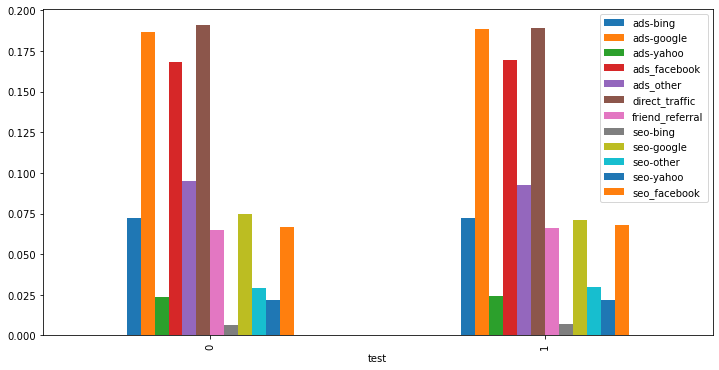

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

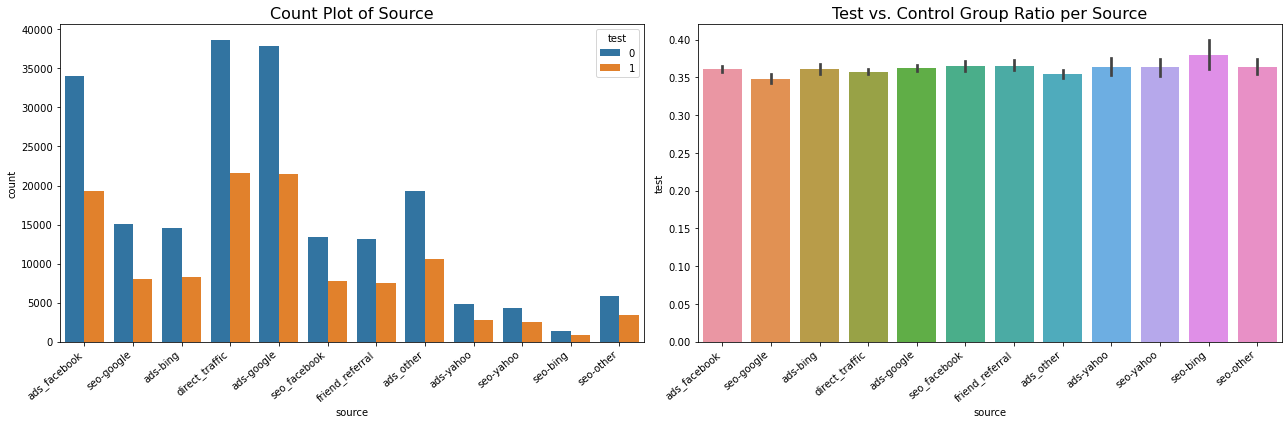

In [22]:
# Visualization of different source
grouped = data[['source', 'test']].groupby('source').mean().sort_values('test').reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
sns.barplot(x='source', y='test', data=data, ax=ax[1]);
ax[1].set_title('Test vs. Control Group Ratio per Source', fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [23]:
count = data[['source', 'test', 'revenue']].groupby(['source', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'revenue_ratio'] = count.loc[count['test'] == 1, 'revenue'] / count[(count['test'] == 1)]['revenue'].sum()
count.loc[count['test'] == 0, 'revenue_ratio'] = count.loc[count['test'] == 0, 'revenue'] / count[(count['test'] == 0)]['revenue'].sum()
count

,source,test,revenue,revenue_ratio
0,ads-bing,0,14584,0.072014
1,ads-bing,1,8247,0.072394
2,ads-google,0,37845,0.186873
3,ads-google,1,21497,0.188706
4,ads-yahoo,0,4812,0.023761
5,ads-yahoo,1,2759,0.024219
6,ads_facebook,0,34074,0.168253
7,ads_facebook,1,19281,0.169253
8,ads_other,0,19256,0.095083
9,ads_other,1,10570,0.092786


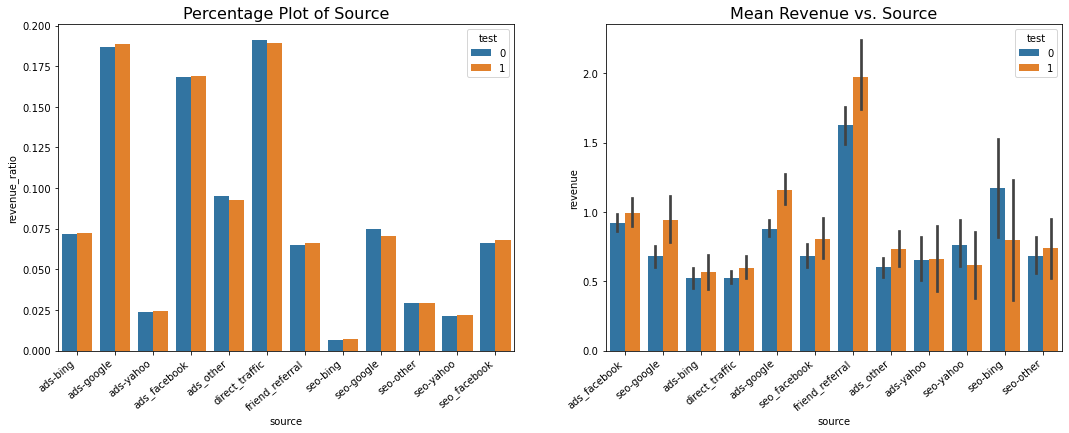

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='source', y='revenue_ratio', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Source', fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")

sns.barplot(x='source', y='revenue', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Revenue vs. Source', fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.show()

### 2. Device

In [25]:
# Check randominess
tmp = data.groupby('test')['device'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp

,mobile,web
test,,
0,0.594365,0.405635
1,0.578469,0.421531


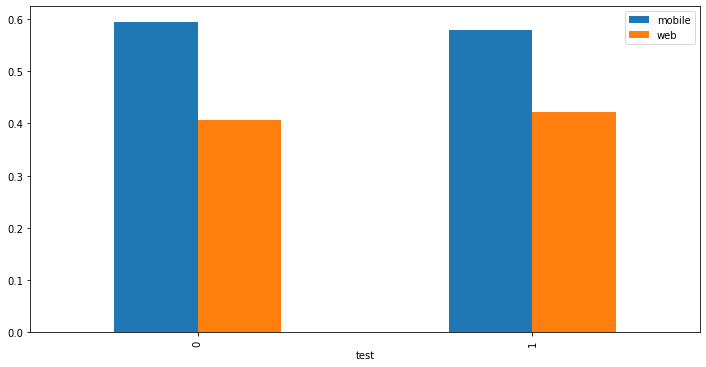

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

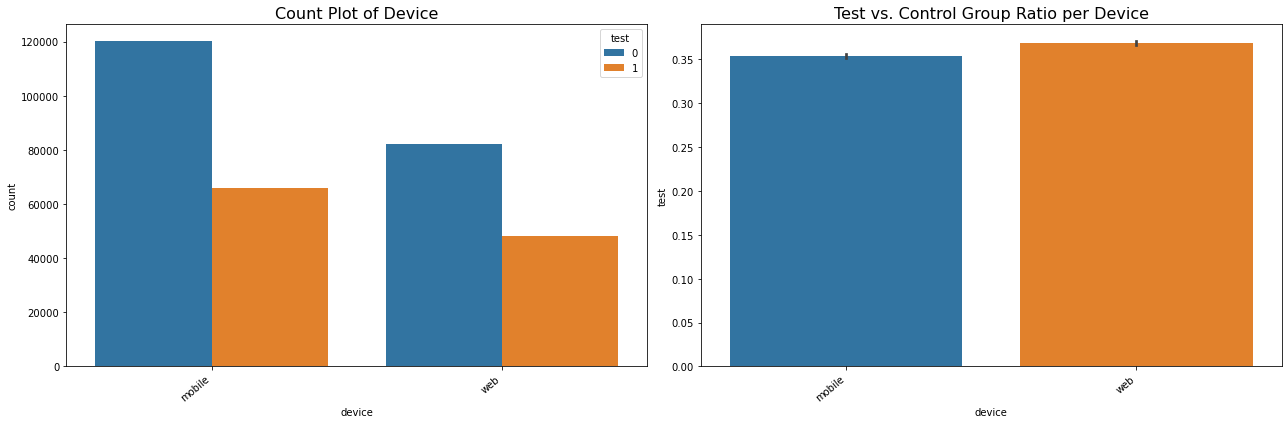

In [27]:
# Visualization of different device
grouped = data[['device', 'test']].groupby('device').mean().sort_values('test').reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='device', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Device', fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
sns.barplot(x='device', y='test', data=data, ax=ax[1]);
ax[1].set_title('Test vs. Control Group Ratio per Device', fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

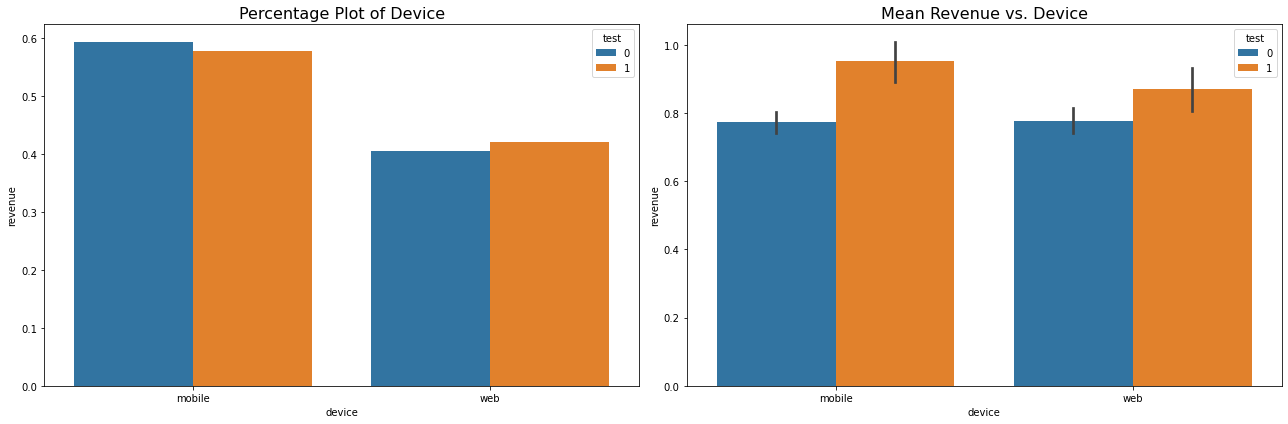

In [28]:
# Visualization of device
count = data[['device', 'test', 'revenue']].groupby(['device', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'revenue'] = count.loc[count['test'] == 1, 'revenue'] / count[(count['test'] == 1)]['revenue'].sum()
count.loc[count['test'] == 0, 'revenue'] = count.loc[count['test'] == 0, 'revenue'] / count[(count['test'] == 0)]['revenue'].sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='device', y='revenue', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Device', fontsize=16)

sns.barplot(x='device', y='revenue', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Revenue vs. Device', fontsize=16)
plt.tight_layout()
plt.show()

### 3. Operative System

In [29]:
# Check randominess
tmp = data.groupby('test')['operative_system'].apply(lambda x: x.value_counts(normalize=True)).unstack()
tmp

,windows,iOS,android,mac,other,linux
test,,,,,,
0,0.313638,0.305125,0.237891,0.080709,0.051754,0.010883
1,0.327718,0.294598,0.234318,0.076459,0.050001,0.016907


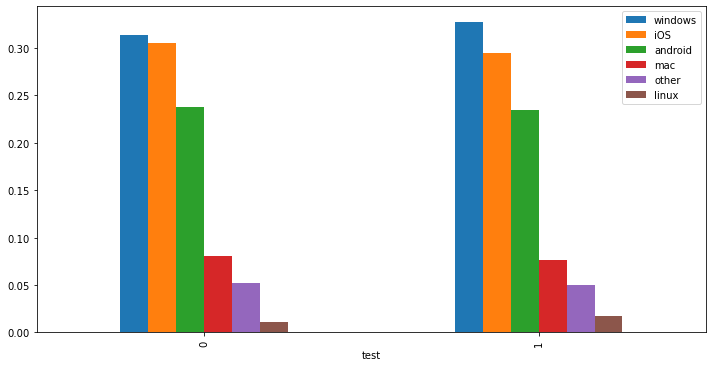

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

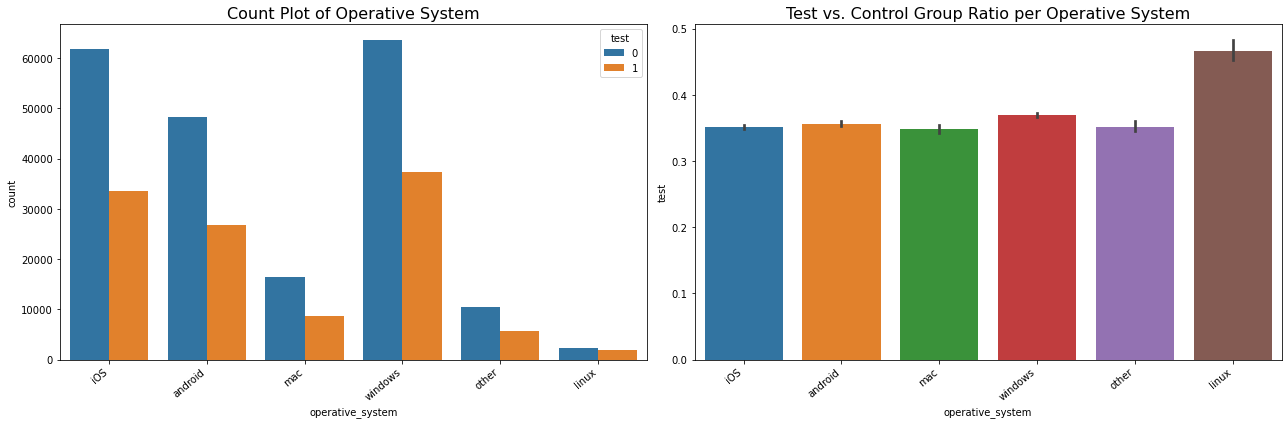

In [31]:
# Visualization of different operative system
grouped = data[['operative_system', 'test']].groupby('operative_system').mean().sort_values('test').reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='operative_system', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Operative System', fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
sns.barplot(x='operative_system', y='test', data=data, ax=ax[1]);
ax[1].set_title('Test vs. Control Group Ratio per Operative System', fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

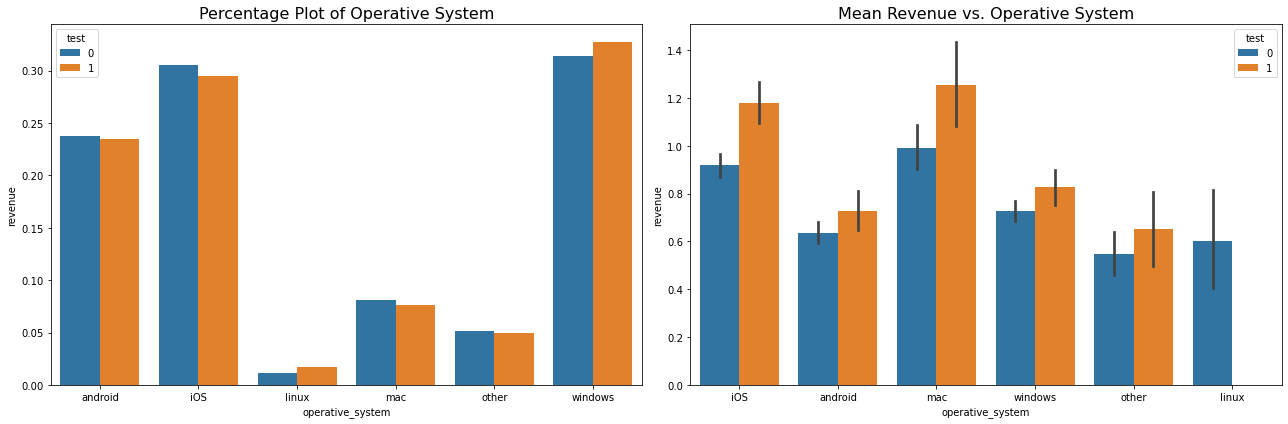

In [32]:
# Visualization of operative system
count = data[['operative_system', 'test', 'revenue']].groupby(['operative_system', 'test']).count().reset_index()
count.loc[count['test'] == 1, 'revenue'] = count.loc[count['test'] == 1, 'revenue'] / count[(count['test'] == 1)]['revenue'].sum()
count.loc[count['test'] == 0, 'revenue'] = count.loc[count['test'] == 0, 'revenue'] / count[(count['test'] == 0)]['revenue'].sum()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x='operative_system', y='revenue', hue='test', data=count, ax=ax[0])
ax[0].set_title('Percentage Plot of Operative System', fontsize=16)

sns.barplot(x='operative_system', y='revenue', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Revenue vs. Operative System', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Visualization of different Age
# No Age in this case

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
# sns.countplot(x='age', hue='test', data=test_data, ax=ax[0])
# ax[0].set_title('Count Plot of Age', fontsize=16)

# sns.barplot(x='age', y='conversion', hue='test', data=test_data, ax=ax[1])
# ax[1].set_title('Mean Conversion Rate per Age', fontsize=16)
# plt.tight_layout()
# plt.show()

From above visualizations, we can see that the test is not  100  randomized, especially device and operative_system. These factors will influence the robostness of our final conclusions.

# AB Testing

In [33]:
# check the conversion rate for A/B test
data[['test', 'converted']].groupby('test').mean()

,converted
test,
0,0.019900
1,0.015555


In [34]:
# check the revenue for A/B test
data[['test', 'revenue']].groupby('test').mean()

,revenue
test,
0,0.776083
1,0.917748


Clearly, for those with lower price $\$39$, they have a higher conversion rate $1.990\%$. For those with higher price $\$59$, the conversion rate is $1.556\%$. However, considering the price, the average revenue for higher price ($0.918$) is actually larger than the lower price ($0.776$).

Now, let's conduct hypothesis testing.

1. Null hypothesis H0: experimental group's average revenue is equal to or less than control group's average revenue
2. Alternative hypothesis H1: experimental group's average revenue is higher than control group's average revenue

In [35]:
# A/B test
test_val=data[data['test']==1]['revenue'].values
cont_val=data[data['test']==0]['revenue'].values
print(test_val.mean(),'\t',cont_val.mean())
print(ttest_ind(test_val,cont_val, axis=0,equal_var=False))

0.917747853719342 	 0.7760829955016122
Ttest_indResult(statistic=5.715224666463108, pvalue=1.0972577312420781e-08)


In [54]:
# A/B test for Source
import  warnings
warnings.simplefilter('ignore')

sources=[name for name in data['source'].unique() if name is not np.nan]
sources.sort()
print(sources)
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Source','Test Rate','Control Rate','P-Value'))
print('-'*65)
for source in sources:
    test_val=test_data[(test_data['source']==source)&(data['test']==1)]['revenue'].values
    cont_val=test_data[(test_data['source']==source)&(data['test']==0)]['revenue'].values
    test_mean=test_val.mean()
    cont_mean=cont_val.mean()
    p_val=ttest_ind(test_val,cont_val,equal_var=False).pvalue
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(source,test_mean,cont_mean,p_val))


['ads-bing', 'ads-google', 'ads-yahoo', 'ads_facebook', 'ads_other', 'direct_traffic', 'friend_referral', 'seo-bing', 'seo-google', 'seo-other', 'seo-yahoo', 'seo_facebook']
Source                Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
ads-bing                0.56518         0.52146   0.551244
ads-google              1.15821         0.88006   0.000011
ads-yahoo               0.66292         0.65648   0.962998
ads_facebook            0.99450         0.92252   0.256442
ads_other               0.73122         0.60153   0.072958
direct_traffic          0.59657         0.52689   0.132004
friend_referral         1.97525         1.62587   0.012448
seo-bing                0.79632         1.17381   0.209393
seo-google              0.94429         0.68240   0.004594
seo-other               0.73640         0.68328   0.685512
seo-yahoo               0.61730         0.76102   0.323569
seo_facebook            0.80225         0.68086   0.

In [58]:
# A/B test for Device
import  warnings
warnings.simplefilter('ignore')

devices=[name for name in data['device'].unique() if name is not np.nan]
devices.sort()
print(devices)
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Device','Test Rate','Control Rate','P-Value'))
print('-'*65)
for device in devices:
    test_val=test_data[(test_data['device']==device)&(data['test']==1)]['revenue'].values
    cont_val=test_data[(test_data['device']==device)&(data['test']==0)]['revenue'].values
    test_mean=test_val.mean()
    cont_mean=cont_val.mean()
    p_val=ttest_ind(test_val,cont_val,equal_var=False).pvalue
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(device,test_mean,cont_mean,p_val))


['mobile', 'web']
Device                Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
mobile                  0.95262         0.77502   0.000000
web                     0.86989         0.77765   0.014198


In [57]:
# A/B test for Operative System
import  warnings
warnings.simplefilter('ignore')

operative_systems=[name for name in data['operative_system'].unique() if name is not np.nan]
operative_systems.sort()
print(devices)
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Operative System','Test Rate','Control Rate','P-Value'))
print('-'*65)
for operative_system in operative_systems:
    test_val=test_data[(test_data['operative_system']==operative_system)&(data['test']==1)]['revenue'].values
    cont_val=test_data[(test_data['operative_system']==operative_system)&(data['test']==0)]['revenue'].values
    test_mean=test_val.mean()
    cont_mean=cont_val.mean()
    p_val=ttest_ind(test_val,cont_val,equal_var=False).pvalue
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(operative_system,test_mean,cont_mean,p_val))


['mobile', 'web']
Operative System       Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
android                 0.72940         0.63709   0.043945
iOS                     1.17965         0.92020   0.000000
linux                   0.00000         0.60163   0.000000
mac                     1.25316         0.99260   0.011460
other                   0.65256         0.54699   0.257522
windows                 0.82653         0.72944   0.019494


## Conversion Rate

### 1. Source

In [36]:
data.groupby('source')[['source','converted']].mean().sort_values('converted',ascending=False).reset_index()

,source,converted
0,friend_referral,0.038688
1,seo-bing,0.023787
2,ads-google,0.021502
3,ads_facebook,0.021198
4,seo-google,0.016978
5,seo-yahoo,0.016226
6,seo_facebook,0.016051
7,seo-other,0.015686
8,ads-yahoo,0.014793
9,ads_other,0.014350


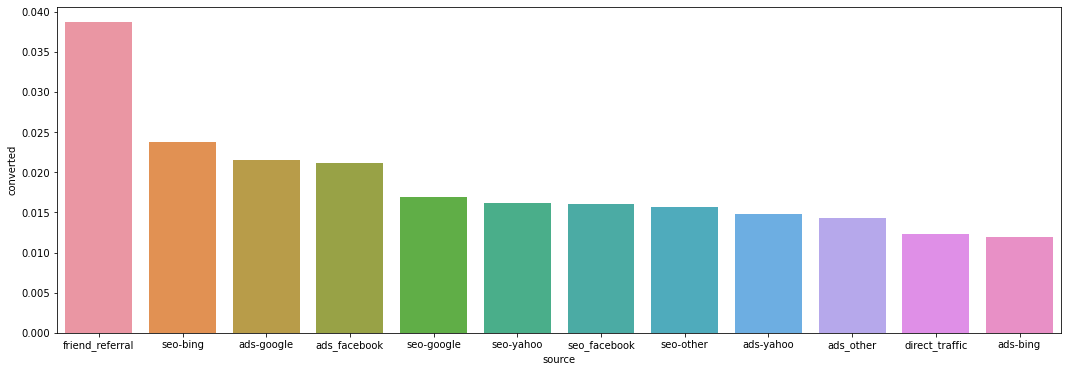

In [48]:
groupby_source=data.groupby('source')[['source','converted']].mean().sort_values('converted',ascending=False).reset_index()
# Visualization by Order
fig,ax=plt.subplots(figsize=(18,6))
sns.barplot(x='source',y='converted',data=groupby_source,ax=ax)
plt.show()

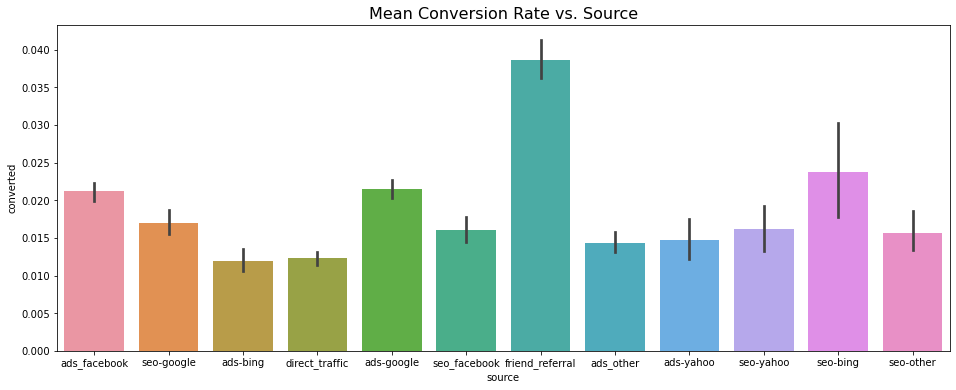

In [49]:
# Visualization of source
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='source', y='converted',data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

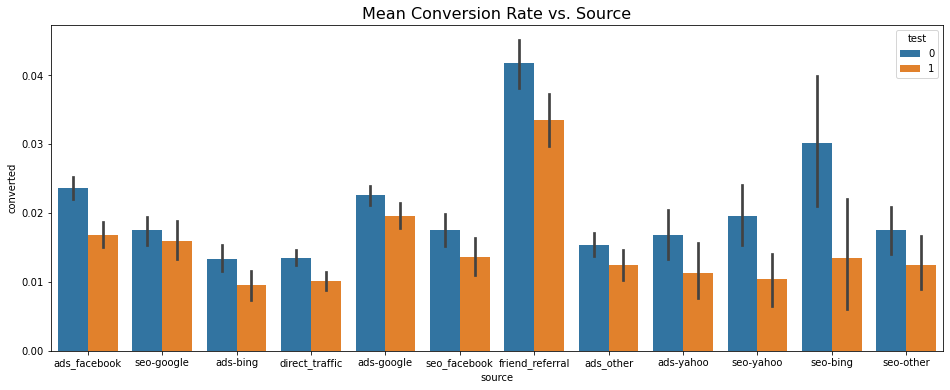

In [38]:
# Visualization of source
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='source', y='converted', hue='test', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

### 2. Device

In [75]:
data.groupby('device')['converted'].mean().reset_index()

,device,converted
0,mobile,0.018554
1,web,0.018023


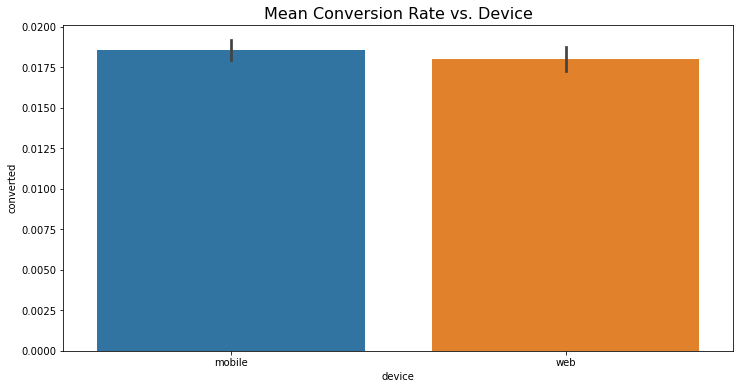

In [76]:
# Visualization of device
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='device', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Device', fontsize=16)
plt.show()

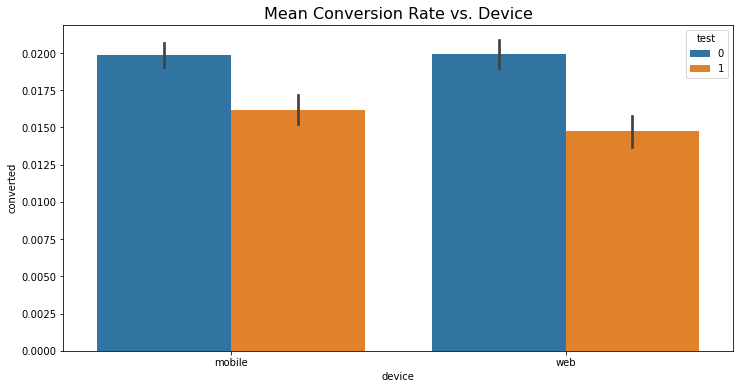

In [77]:
# Visualization of device
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='device', y='converted', hue='test', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Device', fontsize=16)
plt.show()

### 3. Operative System

In [78]:
data.groupby('operative_system')['converted'].mean().reset_index()

,operative_system,converted
0,android,0.014919
1,iOS,0.022328
2,linux,0.008232
3,mac,0.023987
4,other,0.012981
5,windows,0.016966


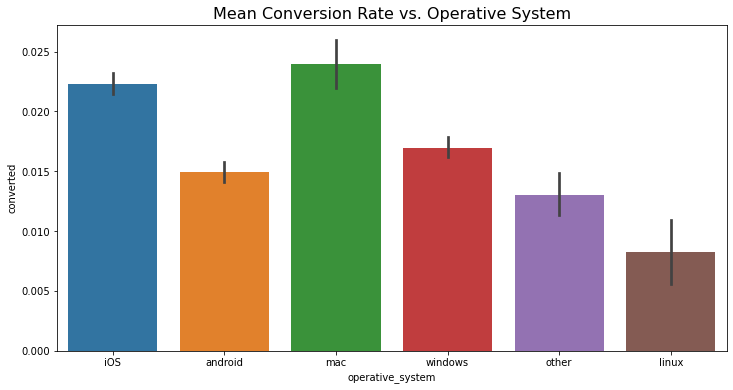

In [79]:
# Visualization of operative system
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='operative_system', y='converted', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Operative System', fontsize=16)
plt.show()

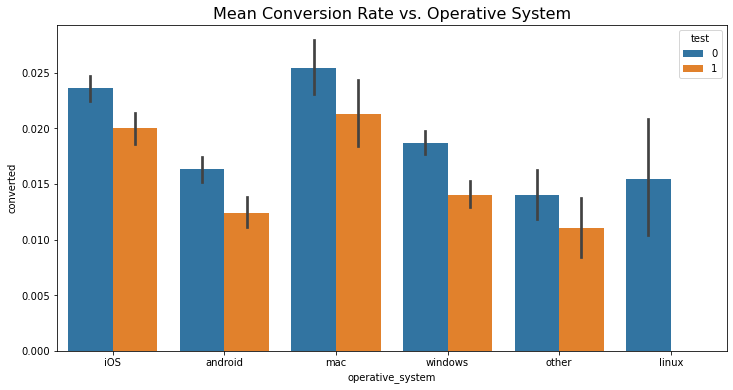

In [80]:
# Visualization of operative system
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='operative_system', y='converted', hue='test', data=data, ax=ax)
ax.set_title('Mean Conversion Rate vs. Operative System', fontsize=16)
plt.show()

From above visualizations, we can easily conclude that price dramatically influence the conversion rate. But beside price, there are still other factors that can influence the conversion rate.

a. Source
* Friend-referral users have much higher conversion rate
   
b. Device
* The influence of device is not significant
   
c. Operative System
* Mac and ios users have much higher conversion rate

## Actionable Insights

friend_referral, Apple user (MAC or iOS), low price are three great positive factors which improve the conversion rate if we want to increase the price, which impacts negatively on conversion rate, we must compensate on the other two factors
* lauch special marketing program targeted to Apple users (MAC or iOS users)
* run some program which rewards user which can invite his/her friend to use our software

Linux users don't like our software as much as users on other OS. Development team should find out the reason. For example, is there any incompatibility issue on Linux?

## Additional Analysis 

In [61]:
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0


In [110]:
def basic_stat(df):
    """ function to calculate statistics """
    conversion_rate = df['converted'].mean()
    money_spent = df['revenue'].mean()

    
    return pd.Series([conversion_rate, money_spent], 
                     index=['converted', 'revenue'])

In [113]:
def group_stat(data):
    grouped = data.groupby('test').apply(basic_stat).reset_index()
    contrg = data[data['test'] ==0]
    testg = data[data['test'] ==1]
    
    names = ['converted', 'revenue']
    vals = []
    for name in names:
        a = contrg[name].mean()
        b = testg[name].mean()
        p_val = ttest_ind(contrg[name], testg[name], equal_var=False)[1] / 2
        c =b-a
        vals.append({'mean_control':a,'mean_test':b,'mean_diff':c,'pvalue':p_val})


        
    return pd.DataFrame(vals,index = names).loc[:,['mean_control','mean_test','mean_diff','pvalue']]

In [114]:
data.groupby('source').apply(group_stat)

mean_control  mean_test  mean_diff        pvalue
source                                                                     
ads-bing        converted      0.013371   0.009579  -0.003792  4.090031e-03
                revenue        0.521462   0.565175   0.043713  2.756218e-01
ads-google      converted      0.022566   0.019631  -0.002935  7.887786e-03
                revenue        0.880063   1.158208   0.278145  5.524790e-06
ads-yahoo       converted      0.016833   0.011236  -0.005597  2.029560e-02
                revenue        0.656484   0.662921   0.006438  4.814992e-01
ads_facebook    converted      0.023654   0.016856  -0.006798  2.101167e-08
                revenue        0.922522   0.994502   0.071981  1.282211e-01
ads_other       converted      0.015424   0.012394  -0.003030  1.494152e-02
                revenue        0.601527   0.731220   0.129694  3.647905e-02
direct_traffic  converted      0.013510   0.010111  -0.003399  7.858960e-05
                revenue        0.526891   0.596568   0.069677  6.600191e-02
friend_referral converted      0.041689   0.033479  -0.008210  1.212665e-03
                revenue        1.625867   1.975255   0.349388  6.224164e-03
seo-bing        converted      0.030098   0.013497  -0.016601  3.697611e-03
                revenue        1.173815   0.796319  -0.377496  1.046965e-01
seo-google      converted      0.017497   0.016005  -0.001492  1.980895e-01
                revenue        0.682397   0.944293   0.261896  2.297026e-03
seo-other       converted      0.017520   0.012481  -0.005039  2.487579e-02
                revenue        0.683279   0.736404   0.053125  3.427562e-01
seo-yahoo       converted      0.019513   0.010463  -0.009051  9.943511e-04
                revenue        0.761019   0.617304  -0.143715  1.617845e-01
seo_facebook    converted      0.017458   0.013598  -0.003860  1.306405e-02
                revenue        0.680856   0.802253   0.121397  8.716345e-02

In [116]:
group_stat(data)

,mean_control,mean_test,mean_diff,pvalue
converted,0.019900,0.015555,-0.004345,7.559699e-20
revenue,0.776083,0.917748,0.141665,5.486289e-09


In [117]:
data.groupby('country').apply(group_stat).reset_index()

,country,level_1,mean_control,mean_test,mean_diff,pvalue
0,,converted,0.020779,0.016280,-0.004500,4.728214e-04
1,,revenue,0.810397,0.960511,0.150114,1.625118e-02
2,USA,converted,0.019768,0.015446,-0.004322,1.890744e-17
3,USA,revenue,0.770967,0.911330,0.140363,5.833444e-08


In [118]:
data.groupby('country').apply(group_stat).xs('revenue',level=1).reset_index()

,country,mean_control,mean_test,mean_diff,pvalue
0,,0.810397,0.960511,0.150114,1.625118e-02
1,USA,0.770967,0.911330,0.140363,5.833444e-08
